# Extract API JSON data

In [2]:
import requests
import json
import pandas as pd
import numpy as np
from pandas import json_normalize

In [3]:
# loop through the pages in order to gather all the entries in a single list
def get_results(data, key):
    result = []
    current_page = data
    has_next = True
    
    while(has_next):
        for data_point in current_page['results']:
            result.append(data_point)

        if current_page['next'] == None:
            has_next = False
        else:
            response = requests.get(current_page['next'])
            current_page = response.json()

    return result

In [4]:
# get the json from the API
response = requests.get("https://swapi.dev/api/?format=json")
root = response.json()

og_data = {}

for key in root:
    response = requests.get(root[key] + '/?format=json')
    og_data[key] = get_results(response.json(), key)
    print(key, 'done')

with open("result2.json", "w") as write_file:
    json.dump(og_data, write_file, indent=4)


people done
planets done
films done
species done
vehicles done
starships done


In [5]:
# get the names or titles instead of the url in lists within the nested objects
data = og_data.copy()

for v in data.values():
    for item in v:
        for key, value in item.items():
            original_key = key

            if key == 'pilots' or key == 'characters' or key == 'residents':
                original_key = 'people'

            if type(value) == list and original_key in data.keys():
                items = []
                for val in value:
                    for root_data in data[original_key]:
                        if root_data['url'] == val:
                            if ('name' in root_data):
                                items.append(root_data['name'])
                            else:
                                items.append(root_data['title'])

                            break
                item[key] = items

            if key == 'homeworld':
                original_key = 'planets'
                for root_data in data[original_key]:
                    if root_data['url'] == value:
                        item[key] = root_data['name']
                        break

# write finished json to file
with open("result.json", "w") as write_file:
    json.dump(data, write_file, indent=4)

# Descriptive analysis

In [6]:
# descriptive analysis for each column
for col in data:
    # create dataframe for each key (people, planets, etc.)
    nested_df = pd.json_normalize(data, col)

    print('\n#############################\n######  Column:', col, '\n#############################')
    print('\nColumns:')
    display(list(nested_df.columns))
    print('------------------\n\nHead (First 5 Items):')
    display(nested_df.head())
    print('------------------\n\nInfo:\n')
    display(nested_df.info())
    print('------------------\n\nDescription:')
    display(nested_df.describe())
    print('------------------\n\nCount values:')
    display(nested_df.count())


#############################
######  Column: people 
#############################

Columns:


['name',
 'height',
 'mass',
 'hair_color',
 'skin_color',
 'eye_color',
 'birth_year',
 'gender',
 'homeworld',
 'films',
 'species',
 'vehicles',
 'starships',
 'created',
 'edited',
 'url']

------------------

Head (First 5 Items):


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],"[Snowspeeder, Imperial Speeder Bike]","[X-wing, Imperial shuttle]",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[Droid],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,Naboo,"[A New Hope, The Empire Strikes Back, Return o...",[Droid],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],[],[TIE Advanced x1],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,Alderaan,"[A New Hope, The Empire Strikes Back, Return o...",[],[Imperial Speeder Bike],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        82 non-null     object
 1   height      82 non-null     object
 2   mass        82 non-null     object
 3   hair_color  82 non-null     object
 4   skin_color  82 non-null     object
 5   eye_color   82 non-null     object
 6   birth_year  82 non-null     object
 7   gender      82 non-null     object
 8   homeworld   82 non-null     object
 9   films       82 non-null     object
 10  species     82 non-null     object
 11  vehicles    82 non-null     object
 12  starships   82 non-null     object
 13  created     82 non-null     object
 14  edited      82 non-null     object
 15  url         82 non-null     object
dtypes: object(16)
memory usage: 10.4+ KB


None

------------------

Description:


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
count,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
unique,82,46,39,12,30,14,37,5,49,19,38,11,16,82,82,82
top,Luke Skywalker,183,unknown,none,fair,brown,unknown,male,Naboo,[Attack of the Clones],[],[],[],2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
freq,1,7,23,36,17,20,39,60,11,13,32,71,63,1,1,1


------------------

Count values:


name          82
height        82
mass          82
hair_color    82
skin_color    82
eye_color     82
birth_year    82
gender        82
homeworld     82
films         82
species       82
vehicles      82
starships     82
created       82
edited        82
url           82
dtype: int64


#############################
######  Column: planets 
#############################

Columns:


['name',
 'rotation_period',
 'orbital_period',
 'diameter',
 'climate',
 'gravity',
 'terrain',
 'surface_water',
 'population',
 'residents',
 'films',
 'created',
 'edited',
 'url']

------------------

Head (First 5 Items):


,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[Luke Skywalker, C-3PO, Darth Vader, Owen Lars...","[A New Hope, Return of the Jedi, The Phantom M...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[Leia Organa, Bail Prestor Organa, Raymus Anti...","[A New Hope, Revenge of the Sith]",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[A New Hope],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[The Empire Strikes Back],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[The Empire Strikes Back, Return of the Jedi, ...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             60 non-null     object
 1   rotation_period  60 non-null     object
 2   orbital_period   60 non-null     object
 3   diameter         60 non-null     object
 4   climate          60 non-null     object
 5   gravity          60 non-null     object
 6   terrain          60 non-null     object
 7   surface_water    60 non-null     object
 8   population       60 non-null     object
 9   residents        60 non-null     object
 10  films            60 non-null     object
 11  created          60 non-null     object
 12  edited           60 non-null     object
 13  url              60 non-null     object
dtypes: object(14)
memory usage: 6.7+ KB


None

------------------

Description:


,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
count,60,60,60,60,60,60,60,60,60,60,60,60,60,60
unique,60,20,44,40,21,14,54,16,40,50,10,60,60,60
top,Tatooine,unknown,unknown,unknown,temperate,1 standard,unknown,unknown,unknown,[],[],2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
freq,1,12,12,16,23,19,7,34,17,11,40,1,1,1


------------------

Count values:


name               60
rotation_period    60
orbital_period     60
diameter           60
climate            60
gravity            60
terrain            60
surface_water      60
population         60
residents          60
films              60
created            60
edited             60
url                60
dtype: int64


#############################
######  Column: films 
#############################

Columns:


['title',
 'episode_id',
 'opening_crawl',
 'director',
 'producer',
 'release_date',
 'characters',
 'planets',
 'starships',
 'vehicles',
 'species',
 'created',
 'edited',
 'url']

------------------

Head (First 5 Items):


,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,starships,vehicles,species,created,edited,url
0,A New Hope,4,It is a period of civil war.\r\nRebel spaceshi...,George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,"[Luke Skywalker, C-3PO, R2-D2, Darth Vader, Le...","[Tatooine, Alderaan, Yavin IV]","[CR90 corvette, Star Destroyer, Sentinel-class...","[Sand Crawler, T-16 skyhopper, X-34 landspeede...","[Human, Droid, Wookie, Rodian, Hutt]",2014-12-10T14:23:31.880000Z,2014-12-20T19:49:45.256000Z,https://swapi.dev/api/films/1/
1,The Empire Strikes Back,5,It is a dark time for the\r\nRebellion. Althou...,Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,"[Luke Skywalker, C-3PO, R2-D2, Darth Vader, Le...","[Hoth, Dagobah, Bespin, Ord Mantell]","[Star Destroyer, Millennium Falcon, Y-wing, X-...","[TIE/LN starfighter, Snowspeeder, TIE bomber, ...","[Human, Droid, Wookie, Yoda's species, Trandos...",2014-12-12T11:26:24.656000Z,2014-12-15T13:07:53.386000Z,https://swapi.dev/api/films/2/
2,Return of the Jedi,6,Luke Skywalker has returned to\r\nhis home pla...,Richard Marquand,"Howard G. Kazanjian, George Lucas, Rick McCallum",1983-05-25,"[Luke Skywalker, C-3PO, R2-D2, Darth Vader, Le...","[Tatooine, Dagobah, Endor, Naboo, Coruscant]","[CR90 corvette, Star Destroyer, Millennium Fal...","[TIE/LN starfighter, TIE bomber, AT-AT, AT-ST,...","[Human, Droid, Wookie, Hutt, Yoda's species, M...",2014-12-18T10:39:33.255000Z,2014-12-20T09:48:37.462000Z,https://swapi.dev/api/films/3/
3,The Phantom Menace,1,Turmoil has engulfed the\r\nGalactic Republic....,George Lucas,Rick McCallum,1999-05-19,"[C-3PO, R2-D2, Obi-Wan Kenobi, Anakin Skywalke...","[Tatooine, Naboo, Coruscant]","[Republic Cruiser, Droid control ship, Naboo f...","[Vulture Droid, Multi-Troop Transport, Armored...","[Human, Droid, Yoda's species, Neimodian, Gung...",2014-12-19T16:52:55.740000Z,2014-12-20T10:54:07.216000Z,https://swapi.dev/api/films/4/
4,Attack of the Clones,2,There is unrest in the Galactic\r\nSenate. Sev...,George Lucas,Rick McCallum,2002-05-16,"[C-3PO, R2-D2, Owen Lars, Beru Whitesun lars, ...","[Tatooine, Naboo, Coruscant, Kamino, Geonosis]","[Slave 1, Droid control ship, Naboo fighter, J...","[Sand Crawler, Zephyr-G swoop bike, Koro-2 Exo...","[Human, Droid, Yoda's species, Gungan, Toydari...",2014-12-20T10:57:57.886000Z,2014-12-20T20:18:48.516000Z,https://swapi.dev/api/films/5/


------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          6 non-null      object
 1   episode_id     6 non-null      int64 
 2   opening_crawl  6 non-null      object
 3   director       6 non-null      object
 4   producer       6 non-null      object
 5   release_date   6 non-null      object
 6   characters     6 non-null      object
 7   planets        6 non-null      object
 8   starships      6 non-null      object
 9   vehicles       6 non-null      object
 10  species        6 non-null      object
 11  created        6 non-null      object
 12  edited         6 non-null      object
 13  url            6 non-null      object
dtypes: int64(1), object(13)
memory usage: 800.0+ bytes


None

------------------

Description:


,episode_id
count,6.000000
mean,3.500000
std,1.870829
min,1.000000
25%,2.250000
50%,3.500000
75%,4.750000
max,6.000000


------------------

Count values:


title            6
episode_id       6
opening_crawl    6
director         6
producer         6
release_date     6
characters       6
planets          6
starships        6
vehicles         6
species          6
created          6
edited           6
url              6
dtype: int64


#############################
######  Column: species 
#############################

Columns:


['name',
 'classification',
 'designation',
 'average_height',
 'skin_colors',
 'hair_colors',
 'eye_colors',
 'average_lifespan',
 'homeworld',
 'language',
 'people',
 'films',
 'created',
 'edited',
 'url']

------------------

Head (First 5 Items):


,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,homeworld,language,people,films,created,edited,url
0,Human,mammal,sentient,180,"caucasian, black, asian, hispanic","blonde, brown, black, red","brown, blue, green, hazel, grey, amber",120,Coruscant,Galactic Basic,"[Dormé, Dooku, Bail Prestor Organa, Jocasta Nu]","[A New Hope, The Empire Strikes Back, Return o...",2014-12-10T13:52:11.567000Z,2014-12-20T21:36:42.136000Z,https://swapi.dev/api/species/1/
1,Droid,artificial,sentient,n/a,n/a,n/a,n/a,indefinite,None,n/a,"[C-3PO, R2-D2, R5-D4, IG-88]","[A New Hope, The Empire Strikes Back, Return o...",2014-12-10T15:16:16.259000Z,2014-12-20T21:36:42.139000Z,https://swapi.dev/api/species/2/
2,Wookie,mammal,sentient,210,gray,"black, brown","blue, green, yellow, brown, golden, red",400,Kashyyyk,Shyriiwook,"[Chewbacca, Tarfful]","[A New Hope, The Empire Strikes Back, Return o...",2014-12-10T16:44:31.486000Z,2014-12-20T21:36:42.142000Z,https://swapi.dev/api/species/3/
3,Rodian,sentient,reptilian,170,"green, blue",n/a,black,unknown,Rodia,Galatic Basic,[Greedo],[A New Hope],2014-12-10T17:05:26.471000Z,2014-12-20T21:36:42.144000Z,https://swapi.dev/api/species/4/
4,Hutt,gastropod,sentient,300,"green, brown, tan",n/a,"yellow, red",1000,Nal Hutta,Huttese,[Jabba Desilijic Tiure],"[A New Hope, Return of the Jedi]",2014-12-10T17:12:50.410000Z,2014-12-20T21:36:42.146000Z,https://swapi.dev/api/species/5/


------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              37 non-null     object
 1   classification    37 non-null     object
 2   designation       37 non-null     object
 3   average_height    37 non-null     object
 4   skin_colors       37 non-null     object
 5   hair_colors       37 non-null     object
 6   eye_colors        37 non-null     object
 7   average_lifespan  37 non-null     object
 8   homeworld         36 non-null     object
 9   language          37 non-null     object
 10  people            37 non-null     object
 11  films             37 non-null     object
 12  created           37 non-null     object
 13  edited            37 non-null     object
 14  url               37 non-null     object
dtypes: object(15)
memory usage: 4.5+ KB


None

------------------

Description:


,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,homeworld,language,people,films,created,edited,url
count,37,37,37,37,37,37,37,37,36,37,37,37,37,37,37
unique,37,10,2,17,32,9,22,15,36,37,37,14,37,37,37
top,Human,mammal,sentient,180,grey,none,black,unknown,Coruscant,Galactic Basic,"[Dormé, Dooku, Bail Prestor Organa, Jocasta Nu]",[The Phantom Menace],2014-12-10T13:52:11.567000Z,2014-12-20T21:36:42.136000Z,https://swapi.dev/api/species/1/
freq,1,16,36,10,2,26,7,20,1,1,1,7,1,1,1


------------------

Count values:


name                37
classification      37
designation         37
average_height      37
skin_colors         37
hair_colors         37
eye_colors          37
average_lifespan    37
homeworld           36
language            37
people              37
films               37
created             37
edited              37
url                 37
dtype: int64


#############################
######  Column: vehicles 
#############################

Columns:


['name',
 'model',
 'manufacturer',
 'cost_in_credits',
 'length',
 'max_atmosphering_speed',
 'crew',
 'passengers',
 'cargo_capacity',
 'consumables',
 'vehicle_class',
 'pilots',
 'films',
 'created',
 'edited',
 'url']

------------------

Head (First 5 Items):


,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class,pilots,films,created,edited,url
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000,36.8,30,46,30,50000,2 months,wheeled,[],"[A New Hope, Attack of the Clones]",2014-12-10T15:36:25.724000Z,2014-12-20T21:30:21.661000Z,https://swapi.dev/api/vehicles/4/
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500,10.4,1200,1,1,50,0,repulsorcraft,[],[A New Hope],2014-12-10T16:01:52.434000Z,2014-12-20T21:30:21.665000Z,https://swapi.dev/api/vehicles/6/
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550,3.4,250,1,1,5,unknown,repulsorcraft,[],[A New Hope],2014-12-10T16:13:52.586000Z,2014-12-20T21:30:21.668000Z,https://swapi.dev/api/vehicles/7/
3,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,unknown,6.4,1200,1,0,65,2 days,starfighter,[],"[A New Hope, The Empire Strikes Back, Return o...",2014-12-10T16:33:52.860000Z,2014-12-20T21:30:21.670000Z,https://swapi.dev/api/vehicles/8/
4,Snowspeeder,t-47 airspeeder,Incom corporation,unknown,4.5,650,2,0,10,none,airspeeder,"[Luke Skywalker, Wedge Antilles]",[The Empire Strikes Back],2014-12-15T12:22:12Z,2014-12-20T21:30:21.672000Z,https://swapi.dev/api/vehicles/14/


------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    39 non-null     object
 1   model                   39 non-null     object
 2   manufacturer            39 non-null     object
 3   cost_in_credits         39 non-null     object
 4   length                  39 non-null     object
 5   max_atmosphering_speed  39 non-null     object
 6   crew                    39 non-null     object
 7   passengers              39 non-null     object
 8   cargo_capacity          39 non-null     object
 9   consumables             39 non-null     object
 10  vehicle_class           39 non-null     object
 11  pilots                  39 non-null     object
 12  films                   39 non-null     object
 13  created                 39 non-null     object
 14  edited                  39 non-nu

None

------------------

Description:


,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class,pilots,films,created,edited,url
count,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
unique,39,39,28,20,34,31,11,14,25,11,19,10,11,39,39,39
top,Sand Crawler,Digger Crawler,Sienar Fleet Systems,unknown,2,1200,1,0,unknown,unknown,repulsorcraft,[],[Revenge of the Sith],2014-12-10T15:36:25.724000Z,2014-12-20T21:30:21.661000Z,https://swapi.dev/api/vehicles/4/
freq,1,1,3,18,3,3,18,16,5,13,7,29,9,1,1,1


------------------

Count values:


name                      39
model                     39
manufacturer              39
cost_in_credits           39
length                    39
max_atmosphering_speed    39
crew                      39
passengers                39
cargo_capacity            39
consumables               39
vehicle_class             39
pilots                    39
films                     39
created                   39
edited                    39
url                       39
dtype: int64


#############################
######  Column: starships 
#############################

Columns:


['name',
 'model',
 'manufacturer',
 'cost_in_credits',
 'length',
 'max_atmosphering_speed',
 'crew',
 'passengers',
 'cargo_capacity',
 'consumables',
 'hyperdrive_rating',
 'MGLT',
 'starship_class',
 'pilots',
 'films',
 'created',
 'edited',
 'url']

------------------

Head (First 5 Items):


,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[A New Hope, Return of the Jedi, Revenge of th...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[A New Hope, The Empire Strikes Back, Return o...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[A New Hope],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[A New Hope],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[Chewbacca, Han Solo, Lando Calrissian, Nien N...","[A New Hope, The Empire Strikes Back, Return o...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/


------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    36 non-null     object
 1   model                   36 non-null     object
 2   manufacturer            36 non-null     object
 3   cost_in_credits         36 non-null     object
 4   length                  36 non-null     object
 5   max_atmosphering_speed  36 non-null     object
 6   crew                    36 non-null     object
 7   passengers              36 non-null     object
 8   cargo_capacity          36 non-null     object
 9   consumables             36 non-null     object
 10  hyperdrive_rating       36 non-null     object
 11  MGLT                    36 non-null     object
 12  starship_class          36 non-null     object
 13  pilots                  36 non-null     object
 14  films                   36 non-nu

None

------------------

Description:


,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
count,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
unique,36,36,27,26,36,21,20,20,26,17,12,13,26,15,12,36,36,36
top,CR90 corvette,CR90 corvette,Kuat Systems Engineering,unknown,150,1050,1,0,unknown,2 years,1.0,unknown,Starfighter,[],[Revenge of the Sith],2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
freq,1,1,4,10,1,5,11,11,7,6,15,19,5,21,9,1,1,1


------------------

Count values:


name                      36
model                     36
manufacturer              36
cost_in_credits           36
length                    36
max_atmosphering_speed    36
crew                      36
passengers                36
cargo_capacity            36
consumables               36
hyperdrive_rating         36
MGLT                      36
starship_class            36
pilots                    36
films                     36
created                   36
edited                    36
url                       36
dtype: int64

# Normalizing the data

In [7]:
with open('result.json') as f:
    data=json.load(f)

In [20]:
df_people=pd.json_normalize(data['people'])
df_planets=json_normalize(data['planets'])
df_films=json_normalize(data['films'])
df_species=json_normalize(data['species'])
df_vehicles=json_normalize(data['vehicles'])
df_starhips=json_normalize(data['starships'])

# Lambda functions


In [21]:
#The year the character was created
df_people['year']=df_people['created'].apply(lambda x: x.split('-')[0])
df_people.head(1)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,year
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],"[Snowspeeder, Imperial Speeder Bike]","[X-wing, Imperial shuttle]",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,2014


Body Mass Index - we are gonna create a column in order to find the Body Mass Index for the character
Formula: weight/(height^2)

In [22]:
 #Converting height into an integer
df_people['height']=df_people['height'].apply(lambda x: np.where(x.isdigit(),x,'NaN'))
df_people['height']=pd.to_numeric(df_people['height'], errors='coerce').convert_dtypes()

In [23]:
#Converting mass into an integer
df_people['mass']=df_people['mass'].apply(lambda x: np.where(x.isdigit(),x,'NaN'))
df_people['mass']=pd.to_numeric(df_people['mass'], errors='coerce').convert_dtypes()

In [24]:
#Defining a new column - Body Mass Index
df_people['Body_Mass_Index']=df_people['mass']/((df_people['height']/100)**2)
df_people.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,year,Body_Mass_Index
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],"[Snowspeeder, Imperial Speeder Bike]","[X-wing, Imperial shuttle]",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,2014,26.027582
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[Droid],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/,2014,26.892323
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,Naboo,"[A New Hope, The Empire Strikes Back, Return o...",[Droid],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/,2014,34.722222
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],[],[TIE Advanced x1],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/,2014,33.330066
4,Leia Organa,150,49,brown,light,brown,19BBY,female,Alderaan,"[A New Hope, The Empire Strikes Back, Return o...",[],[Imperial Speeder Bike],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/,2014,21.777778


In [25]:
#The people who are from the homeworld "Tatooine" are gonna recieve a weapon (a blaster)

df_people['Weapons']=df_people['homeworld'].apply(lambda x: 'Blaster' if(x == 'Tatooine') else None)
df_people.head(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,year,Body_Mass_Index,Weapons
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],"[Snowspeeder, Imperial Speeder Bike]","[X-wing, Imperial shuttle]",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,2014,26.027582,Blaster
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[Droid],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/,2014,26.892323,Blaster
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,Naboo,"[A New Hope, The Empire Strikes Back, Return o...",[Droid],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/,2014,34.722222,None
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],[],[TIE Advanced x1],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/,2014,33.330066,Blaster
4,Leia Organa,150,49,brown,light,brown,19BBY,female,Alderaan,"[A New Hope, The Empire Strikes Back, Return o...",[],[Imperial Speeder Bike],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/,2014,21.777778,None
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,Tatooine,"[A New Hope, Attack of the Clones, Revenge of ...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/,2014,37.874006,Blaster
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,Tatooine,"[A New Hope, Attack of the Clones, Revenge of ...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/,2014,27.548209,Blaster
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,Tatooine,[A New Hope],[Droid],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/,2014,34.00999,Blaster
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,Tatooine,[A New Hope],[],[],[X-wing],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/,2014,25.082863,Blaster
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,Stewjon,"[A New Hope, The Empire Strikes Back, Return o...",[],[Tribubble bongo],"[Jedi starfighter, Trade Federation cruiser, N...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/,2014,23.245985,None


In [26]:
#This function is going to assign the title of "Destroyer of the world" for the starship that is part of the Star Destroyer class

df_starhips['Best_starship_class']=df_starhips['starship_class'].apply(lambda x: 'Destroyer of the world' if x=='Star Destroyer' else None)
df_starhips.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url,Best_starship_class
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[A New Hope, Return of the Jedi, Revenge of th...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/,None
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[A New Hope, The Empire Strikes Back, Return o...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/,Destroyer of the world
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[A New Hope],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/,None
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[A New Hope],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/,None
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[Chewbacca, Han Solo, Lando Calrissian, Nien N...","[A New Hope, The Empire Strikes Back, Return o...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/,None


# Cleaning Featuring

In [27]:
import pandas as pd
import numpy as np

for col in data:
    nested_df = pd.json_normalize(data, col)
    print('\n  Column:', col, '\n')  
    
   #Displaying the data
    print(nested_df.head(20))
    
  #Displaying how many columns and rows has each data frame
    display(nested_df.shape)
               
   #Percentage of missing values from data set
    for column in nested_df.columns: 
        if (type(column) != list) & (type(column) != str):
            column.drop_duplicates()


  Column: people 

                     name height     mass     hair_color        skin_color  \
0          Luke Skywalker    172       77          blond              fair   
1                   C-3PO    167       75            n/a              gold   
2                   R2-D2     96       32            n/a       white, blue   
3             Darth Vader    202      136           none             white   
4             Leia Organa    150       49          brown             light   
5               Owen Lars    178      120    brown, grey             light   
6      Beru Whitesun lars    165       75          brown             light   
7                   R5-D4     97       32            n/a        white, red   
8       Biggs Darklighter    183       84          black             light   
9          Obi-Wan Kenobi    182       77  auburn, white              fair   
10       Anakin Skywalker    188       84          blond              fair   
11         Wilhuff Tarkin    180  unknown   

(82, 16)


  Column: planets 

              name rotation_period orbital_period diameter  \
0         Tatooine              23            304    10465   
1         Alderaan              24            364    12500   
2         Yavin IV              24           4818    10200   
3             Hoth              23            549     7200   
4          Dagobah              23            341     8900   
5           Bespin              12           5110   118000   
6            Endor              18            402     4900   
7            Naboo              26            312    12120   
8        Coruscant              24            368    12240   
9           Kamino              27            463    19720   
10        Geonosis              30            256    11370   
11          Utapau              27            351    12900   
12        Mustafar              36            412     4200   
13        Kashyyyk              26            381    12765   
14     Polis Massa              24            590

(60, 14)


  Column: films 

                     title  episode_id  \
0               A New Hope           4   
1  The Empire Strikes Back           5   
2       Return of the Jedi           6   
3       The Phantom Menace           1   
4     Attack of the Clones           2   
5      Revenge of the Sith           3   

                                       opening_crawl          director  \
0  It is a period of civil war.\r\nRebel spaceshi...      George Lucas   
1  It is a dark time for the\r\nRebellion. Althou...    Irvin Kershner   
2  Luke Skywalker has returned to\r\nhis home pla...  Richard Marquand   
3  Turmoil has engulfed the\r\nGalactic Republic....      George Lucas   
4  There is unrest in the Galactic\r\nSenate. Sev...      George Lucas   
5  War! The Republic is crumbling\r\nunder attack...      George Lucas   

                                           producer release_date  \
0                         Gary Kurtz, Rick McCallum   1977-05-25   
1                         Gary 

(6, 14)


  Column: species 

              name classification designation average_height  \
0            Human         mammal    sentient            180   
1            Droid     artificial    sentient            n/a   
2           Wookie         mammal    sentient            210   
3           Rodian       sentient   reptilian            170   
4             Hutt      gastropod    sentient            300   
5   Yoda's species         mammal    sentient             66   
6       Trandoshan        reptile    sentient            200   
7     Mon Calamari      amphibian    sentient            160   
8             Ewok         mammal    sentient            100   
9        Sullustan         mammal    sentient            180   
10       Neimodian        unknown    sentient            180   
11          Gungan      amphibian    sentient            190   
12       Toydarian         mammal    sentient            120   
13             Dug         mammal    sentient            100   
14         Twi'lek 

(37, 15)


  Column: vehicles 

                              name                            model  \
0                     Sand Crawler                   Digger Crawler   
1                   T-16 skyhopper                   T-16 skyhopper   
2                 X-34 landspeeder                 X-34 landspeeder   
3               TIE/LN starfighter   Twin Ion Engine/Ln Starfighter   
4                      Snowspeeder                  t-47 airspeeder   
5                       TIE bomber                    TIE/sa bomber   
6                            AT-AT    All Terrain Armored Transport   
7                            AT-ST      All Terrain Scout Transport   
8      Storm IV Twin-Pod cloud car                Storm IV Twin-Pod   
9                       Sail barge       Modified Luxury Sail Barge   
10           Bantha-II cargo skiff                        Bantha-II   
11              TIE/IN interceptor      Twin Ion Engine Interceptor   
12           Imperial Speeder Bike                74-Z 

(39, 16)


  Column: starships 

                             name                                 model  \
0                   CR90 corvette                         CR90 corvette   
1                  Star Destroyer       Imperial I-class Star Destroyer   
2    Sentinel-class landing craft          Sentinel-class landing craft   
3                      Death Star           DS-1 Orbital Battle Station   
4               Millennium Falcon               YT-1300 light freighter   
5                          Y-wing                            BTL Y-wing   
6                          X-wing                           T-65 X-wing   
7                 TIE Advanced x1           Twin Ion Engine Advanced x1   
8                        Executor       Executor-class star dreadnought   
9                 Rebel transport                GR-75 medium transport   
10                        Slave 1  Firespray-31-class patrol and attack   
11               Imperial shuttle             Lambda-class T-4a shuttle   
12

(36, 18)

In [28]:
#Filling the missing data from data frame planets - column surface_water & population - with mean

 #Converting surface water into an integer
df_planets['surface_water']=df_planets['surface_water'].apply(lambda x: np.where(x.isdigit(),x,'unknown'))
df_planets['surface_water']=pd.to_numeric(df_planets['surface_water'], errors='coerce').convert_dtypes()
df_planets.head(10)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[Luke Skywalker, C-3PO, Darth Vader, Owen Lars...","[A New Hope, Return of the Jedi, The Phantom M...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[Leia Organa, Bail Prestor Organa, Raymus Anti...","[A New Hope, Revenge of the Sith]",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[A New Hope],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[The Empire Strikes Back],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[The Empire Strikes Back, Return of the Jedi, ...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000,[Lobot],[The Empire Strikes Back],2014-12-10T11:43:55.240000Z,2014-12-20T20:58:18.427000Z,https://swapi.dev/api/planets/6/
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000,[Wicket Systri Warrick],[Return of the Jedi],2014-12-10T11:50:29.349000Z,2014-12-20T20:58:18.429000Z,https://swapi.dev/api/planets/7/
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000,"[R2-D2, Palpatine, Padmé Amidala, Jar Jar Bink...","[Return of the Jedi, The Phantom Menace, Attac...",2014-12-10T11:52:31.066000Z,2014-12-20T20:58:18.430000Z,https://swapi.dev/api/planets/8/
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",<NA>,1000000000000,"[Finis Valorum, Adi Gallia, Jocasta Nu]","[Return of the Jedi, The Phantom Menace, Attac...",2014-12-10T11:54:13.921000Z,2014-12-20T20:58:18.432000Z,https://swapi.dev/api/planets/9/
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000,"[Boba Fett, Lama Su, Taun We]",[Attack of the Clones],2014-12-10T12:45:06.577000Z,2014-12-20T20:58:18.434000Z,https://swapi.dev/api/planets/10/


In [29]:
#Filling the missing data from data frame people - column mass & height - with the mean

mean_mass=int(df_people['mass'].mean())
df_people['mass']=df_people['mass'].fillna(value=mean_mass)

mean_height=int(df_people['height'].mean())
df_people['height']=df_people['height'].fillna(value=mean_height)

df_people.head(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,year,Body_Mass_Index,Weapons
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],"[Snowspeeder, Imperial Speeder Bike]","[X-wing, Imperial shuttle]",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,2014,26.027582,Blaster
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[Droid],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/,2014,26.892323,Blaster
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,Naboo,"[A New Hope, The Empire Strikes Back, Return o...",[Droid],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/,2014,34.722222,None
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],[],[TIE Advanced x1],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/,2014,33.330066,Blaster
4,Leia Organa,150,49,brown,light,brown,19BBY,female,Alderaan,"[A New Hope, The Empire Strikes Back, Return o...",[],[Imperial Speeder Bike],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/,2014,21.777778,None
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,Tatooine,"[A New Hope, Attack of the Clones, Revenge of ...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/,2014,37.874006,Blaster
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,Tatooine,"[A New Hope, Attack of the Clones, Revenge of ...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/,2014,27.548209,Blaster
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,Tatooine,[A New Hope],[Droid],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/,2014,34.00999,Blaster
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,Tatooine,[A New Hope],[],[],[X-wing],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/,2014,25.082863,Blaster
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,Stewjon,"[A New Hope, The Empire Strikes Back, Return o...",[],[Tribubble bongo],"[Jedi starfighter, Trade Federation cruiser, N...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/,2014,23.245985,None


In [30]:
#Converting population into integer

df_planets['popluation']=df_planets['population'].apply(lambda x: np.where(x.isdigit(),x,'unknown'))
df_planets['population']=pd.to_numeric(df_planets['population'], errors='coerce').convert_dtypes()

In [31]:
#Filling the missing data with the mean

mean_surface_water=int(df_planets['surface_water'].mean())
df_planets['surface_water']=df_planets['surface_water'].fillna(value=mean_surface_water)
mean_population=int(df_planets['population'].mean())
df_planets['population']=df_planets['population'].fillna(value=mean_surface_water)
df_planets.head(10)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url,popluation
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000.0,"[Luke Skywalker, C-3PO, Darth Vader, Owen Lars...","[A New Hope, Return of the Jedi, The Phantom M...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/,200000
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000.0,"[Leia Organa, Bail Prestor Organa, Raymus Anti...","[A New Hope, Revenge of the Sith]",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/,2000000000
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000.0,[],[A New Hope],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/,1000
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,38.0,[],[The Empire Strikes Back],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/,unknown
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,38.0,[],"[The Empire Strikes Back, Return of the Jedi, ...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/,unknown
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000.0,[Lobot],[The Empire Strikes Back],2014-12-10T11:43:55.240000Z,2014-12-20T20:58:18.427000Z,https://swapi.dev/api/planets/6/,6000000
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000.0,[Wicket Systri Warrick],[Return of the Jedi],2014-12-10T11:50:29.349000Z,2014-12-20T20:58:18.429000Z,https://swapi.dev/api/planets/7/,30000000
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000.0,"[R2-D2, Palpatine, Padmé Amidala, Jar Jar Bink...","[Return of the Jedi, The Phantom Menace, Attac...",2014-12-10T11:52:31.066000Z,2014-12-20T20:58:18.430000Z,https://swapi.dev/api/planets/8/,4500000000
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",38,1000000000000.0,"[Finis Valorum, Adi Gallia, Jocasta Nu]","[Return of the Jedi, The Phantom Menace, Attac...",2014-12-10T11:54:13.921000Z,2014-12-20T20:58:18.432000Z,https://swapi.dev/api/planets/9/,1000000000000
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000.0,"[Boba Fett, Lama Su, Taun We]",[Attack of the Clones],2014-12-10T12:45:06.577000Z,2014-12-20T20:58:18.434000Z,https://swapi.dev/api/planets/10/,1000000000


In [32]:
#Renaming the column created to "Date_of_creation"

df_people=df_people.rename(columns={"created": "Date_of_creation"})
df_people.head(1)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,Date_of_creation,edited,url,year,Body_Mass_Index,Weapons
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],"[Snowspeeder, Imperial Speeder Bike]","[X-wing, Imperial shuttle]",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,2014,26.027582,Blaster


In [33]:
#Deleting the column "edited"

df_people.drop("edited", axis=1, inplace = True)
df_people.head(1)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,Date_of_creation,url,year,Body_Mass_Index,Weapons
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],"[Snowspeeder, Imperial Speeder Bike]","[X-wing, Imperial shuttle]",2014-12-09T13:50:51.644000Z,https://swapi.dev/api/people/1/,2014,26.027582,Blaster


<AxesSubplot:>

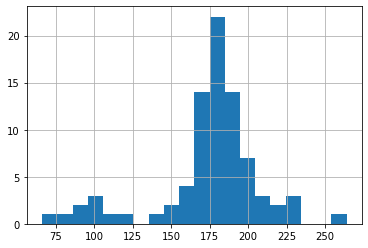

In [34]:
#Displaying the histogram of height -- we can see from the graph that the average height for the people is around 175 cm

df_people['height'].hist(bins=20)

<AxesSubplot:>

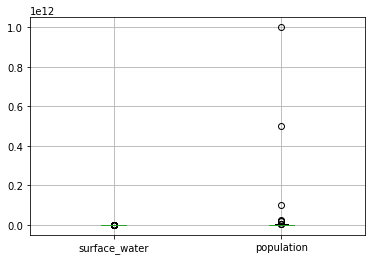

In [35]:
#Checking for outliers in the planets dataframe

df_planets.boxplot()

In [36]:
df_planets.head(1)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url,popluation
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000.0,"[Luke Skywalker, C-3PO, Darth Vader, Owen Lars...","[A New Hope, Return of the Jedi, The Phantom M...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/,200000


<AxesSubplot:xlabel='rotation_period', ylabel='diameter'>

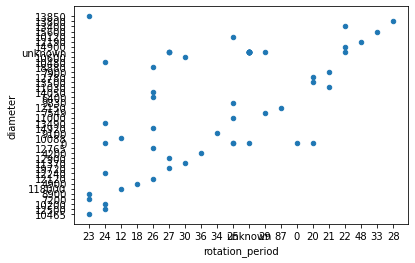

In [37]:
#Sctater plot - between rotation period and diameter for the data frame planets

df_planets.plot.scatter(x='rotation_period', y='diameter')

<AxesSubplot:>

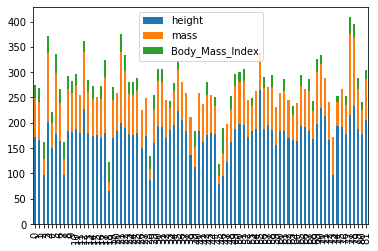

In [38]:
#Bar plot on the numerical values of the people data frame

df_people.plot.bar(stacked=True)

In [39]:
#Turning the opening crawl to lowercase ( dataframe - films)
df_films['lowercase'] = df_films['opening_crawl'].str.lower()
df_films.tail(1)

,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,starships,vehicles,species,created,edited,url,lowercase
5,Revenge of the Sith,3,War! The Republic is crumbling\r\nunder attack...,George Lucas,Rick McCallum,2005-05-19,"[Luke Skywalker, C-3PO, R2-D2, Darth Vader, Le...","[Tatooine, Alderaan, Dagobah, Naboo, Coruscant...","[CR90 corvette, Droid control ship, Jedi starf...","[Vulture Droid, LAAT/i, AT-TE, Neimoidian shut...","[Human, Droid, Wookie, Yoda's species, Twi'lek...",2014-12-20T18:49:38.403000Z,2014-12-20T20:47:52.073000Z,https://swapi.dev/api/films/6/,war! the republic is crumbling\r\nunder attack...


In [60]:
#Display the column's name for the data frame films

df_films.columns

Index(['title', 'episode_id', 'opening_crawl', 'director', 'producer',
       'release_date', 'characters', 'planets', 'starships', 'vehicles',
       'species', 'created', 'edited', 'url', 'lowercase'],
      dtype='object')

In [57]:
# Count the number of manufacturers from data frame vehicles

df_vehicles['manufacturer'].value_counts()

Sienar Fleet Systems                                          3
Baktoid Armor Workshop                                        3
Rothana Heavy Engineering                                     3
Kuat Drive Yards                                              2
Kuat Drive Yards, Imperial Department of Military Research    2
Appazanna Engineering Works                                   2
Huppla Pasa Tisc Shipwrights Collective                       2
Haor Chall Engineering                                        2
Corellia Mining Corporation                                   1
Desler Gizh Outworld Mobility Corporation                     1
Techno Union                                                  1
Colla Designs, Phlac-Arphocc Automata Industries              1
unknown                                                       1
Z-Gomot Ternbuell Guppat Corporation                          1
Rothana Heavy Engineering, Kuat Drive Yards                   1
Narglatch AirTech prefabricated kit     

In [40]:
#Unique
df_people['name'].is_unique

True

In [41]:
#Deleting the rows that are null values

df_people.replace(['n/a', 'unknown', 'none', 'NaN'], np.nan, inplace=True)
df_people.dropna( inplace = True )
df_people

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,Date_of_creation,url,year,Body_Mass_Index,Weapons
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],"[Snowspeeder, Imperial Speeder Bike]","[X-wing, Imperial shuttle]",2014-12-09T13:50:51.644000Z,https://swapi.dev/api/people/1/,2014,26.027582,Blaster
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,Tatooine,"[A New Hope, Attack of the Clones, Revenge of ...",[],[],[],2014-12-10T15:52:14.024000Z,https://swapi.dev/api/people/6/,2014,37.874006,Blaster
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,Tatooine,"[A New Hope, Attack of the Clones, Revenge of ...",[],[],[],2014-12-10T15:53:41.121000Z,https://swapi.dev/api/people/7/,2014,27.548209,Blaster
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,Tatooine,[A New Hope],[],[],[X-wing],2014-12-10T15:59:50.509000Z,https://swapi.dev/api/people/9/,2014,25.082863,Blaster
10,Anakin Skywalker,188,84,blond,fair,blue,41.9BBY,male,Tatooine,"[The Phantom Menace, Attack of the Clones, Rev...",[],"[Zephyr-G swoop bike, XJ-6 airspeeder]","[Naboo fighter, Trade Federation cruiser, Jedi...",2014-12-10T16:20:44.310000Z,https://swapi.dev/api/people/11/,2014,23.76641,Blaster


# Agregation

In [42]:
#Sorting the people by height

df_people.sort_values(by=['height'],ascending=True,inplace=False)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,Date_of_creation,url,year,Body_Mass_Index,Weapons
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,Tatooine,"[A New Hope, Attack of the Clones, Revenge of ...",[],[],[],2014-12-10T15:53:41.121000Z,https://swapi.dev/api/people/7/,2014,27.548209,Blaster
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,"[A New Hope, The Empire Strikes Back, Return o...",[],"[Snowspeeder, Imperial Speeder Bike]","[X-wing, Imperial shuttle]",2014-12-09T13:50:51.644000Z,https://swapi.dev/api/people/1/,2014,26.027582,Blaster
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,Tatooine,"[A New Hope, Attack of the Clones, Revenge of ...",[],[],[],2014-12-10T15:52:14.024000Z,https://swapi.dev/api/people/6/,2014,37.874006,Blaster
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,Tatooine,[A New Hope],[],[],[X-wing],2014-12-10T15:59:50.509000Z,https://swapi.dev/api/people/9/,2014,25.082863,Blaster
10,Anakin Skywalker,188,84,blond,fair,blue,41.9BBY,male,Tatooine,"[The Phantom Menace, Attack of the Clones, Rev...",[],"[Zephyr-G swoop bike, XJ-6 airspeeder]","[Naboo fighter, Trade Federation cruiser, Jedi...",2014-12-10T16:20:44.310000Z,https://swapi.dev/api/people/11/,2014,23.76641,Blaster


In [43]:
#We are going to filter the planets by the average population
df_planets_average_population=df_planets.groupby("name")['population'].mean().sort_values(ascending=False).head(10)
df_planets_average_population

name
Coruscant      1000000000000.0
Skako           500000000000.0
Geonosis        100000000000.0
Mon Cala         27000000000.0
Eriadu           22000000000.0
Sullust          18500000000.0
Nal Hutta         7000000000.0
Muunilinst        5000000000.0
Naboo             4500000000.0
Ord Mantell       4000000000.0
Name: population, dtype: Float64

In [44]:
#We are going to check the climate for each planet
df_planets_climate_count= df_planets.groupby(['name','terrain'])['climate'].count()
df_planets_climate_count

name            terrain                                 
Alderaan        grasslands, mountains                       1
Aleen Minor     unknown                                     1
Bespin          gas giant                                   1
Bestine IV      rocky islands, oceans                       1
Cato Neimoidia  mountains, fields, forests, rock arches     1
Cerea           verdant                                     1
Champala        oceans, rainforests, plateaus               1
Chandrila       plains, forests                             1
Concord Dawn    jungles, forests, deserts                   1
Corellia        plains, urban, hills, forests               1
Coruscant       cityscape, mountains                        1
Dagobah         swamp, jungles                              1
Dantooine       oceans, savannas, mountains, grasslands     1
Dathomir        forests, deserts, savannas                  1
Dorin           unknown                                     1
Endor        

In [45]:
#Checking how many vehicles has one class
df_vehicles_class=df_vehicles.groupby(['vehicle_class'])['vehicle_class'].count()
df_vehicles_class

vehicle_class
air speeder                  1
airspeeder                   5
assault walker               1
droid starfighter            1
droid tank                   1
fire suppression ship        1
gunship                      2
landing craft                1
repulsorcraft                7
repulsorcraft cargo skiff    1
sail barge                   1
space/planetary bomber       1
speeder                      3
starfighter                  4
submarine                    1
transport                    1
walker                       4
wheeled                      1
wheeled walker               2
Name: vehicle_class, dtype: int64

In [46]:
#Filtering the data by climate and displaying the maximum rotation period for each climate

df_planets_average_rotation_period=df_planets.groupby(['climate'])['rotation_period'].max()
df_planets_average_rotation_period

climate
arid                              25
arid, rocky, windy                22
arid, temperate, tropical         26
artificial temperate              24
frigid                       unknown
frozen                            23
hot                               36
hot, humid                        34
murky                             23
polluted                          24
superheated                       20
temperate                    unknown
temperate, arid                   30
temperate, arid, subartic         30
temperate, arid, windy            27
temperate, artic                  22
temperate, moist                  25
temperate, tropical               24
tropical                          26
tropical, temperate               33
unknown                      unknown
Name: rotation_period, dtype: object

In [47]:
#Displaying the people with the body mass index over 25

df_people[
    df_people['Body_Mass_Index'] > 25
][['name', 'Body_Mass_Index']].groupby('name').mean().sort_values(by=['Body_Mass_Index'], ascending=False).head(10)


,Body_Mass_Index
name,
Owen Lars,37.874006
Beru Whitesun lars,27.548209
Luke Skywalker,26.027582
Biggs Darklighter,25.082863


In [48]:
#Converting passengers to integer

df_vehicles['passengers']=df_vehicles['passengers'].apply(lambda x: np.where(x.isdigit(),x,'unknown'))
df_vehicles['passengers']=pd.to_numeric(df_vehicles['passengers'], errors='coerce').convert_dtypes()

In [49]:
#Checking the passengers over 100

df_vehicles['passengers_over100']=df_vehicles['passengers']>100
df_vehicles.head(5)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class,pilots,films,created,edited,url,passengers_over100
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000,36.8,30,46,30,50000,2 months,wheeled,[],"[A New Hope, Attack of the Clones]",2014-12-10T15:36:25.724000Z,2014-12-20T21:30:21.661000Z,https://swapi.dev/api/vehicles/4/,False
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500,10.4,1200,1,1,50,0,repulsorcraft,[],[A New Hope],2014-12-10T16:01:52.434000Z,2014-12-20T21:30:21.665000Z,https://swapi.dev/api/vehicles/6/,False
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550,3.4,250,1,1,5,unknown,repulsorcraft,[],[A New Hope],2014-12-10T16:13:52.586000Z,2014-12-20T21:30:21.668000Z,https://swapi.dev/api/vehicles/7/,False
3,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,unknown,6.4,1200,1,0,65,2 days,starfighter,[],"[A New Hope, The Empire Strikes Back, Return o...",2014-12-10T16:33:52.860000Z,2014-12-20T21:30:21.670000Z,https://swapi.dev/api/vehicles/8/,False
4,Snowspeeder,t-47 airspeeder,Incom corporation,unknown,4.5,650,2,0,10,none,airspeeder,"[Luke Skywalker, Wedge Antilles]",[The Empire Strikes Back],2014-12-15T12:22:12Z,2014-12-20T21:30:21.672000Z,https://swapi.dev/api/vehicles/14/,False


In [50]:
#Checking if there is a speeder_model

df_vehicles['speeder_model']=df_vehicles['model'].str.find('speeder')
df_vehicles

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class,pilots,films,created,edited,url,passengers_over100,speeder_model
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000,36.8,30,46,30,50000,2 months,wheeled,[],"[A New Hope, Attack of the Clones]",2014-12-10T15:36:25.724000Z,2014-12-20T21:30:21.661000Z,https://swapi.dev/api/vehicles/4/,False,-1
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500,10.4,1200,1,1,50,0,repulsorcraft,[],[A New Hope],2014-12-10T16:01:52.434000Z,2014-12-20T21:30:21.665000Z,https://swapi.dev/api/vehicles/6/,False,-1
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550,3.4,250,1,1,5,unknown,repulsorcraft,[],[A New Hope],2014-12-10T16:13:52.586000Z,2014-12-20T21:30:21.668000Z,https://swapi.dev/api/vehicles/7/,False,9
3,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,unknown,6.4,1200,1,0,65,2 days,starfighter,[],"[A New Hope, The Empire Strikes Back, Return o...",2014-12-10T16:33:52.860000Z,2014-12-20T21:30:21.670000Z,https://swapi.dev/api/vehicles/8/,False,-1
4,Snowspeeder,t-47 airspeeder,Incom corporation,unknown,4.5,650,2,0,10,none,airspeeder,"[Luke Skywalker, Wedge Antilles]",[The Empire Strikes Back],2014-12-15T12:22:12Z,2014-12-20T21:30:21.672000Z,https://swapi.dev/api/vehicles/14/,False,8
5,TIE bomber,TIE/sa bomber,Sienar Fleet Systems,unknown,7.8,850,1,0,none,2 days,space/planetary bomber,[],"[The Empire Strikes Back, Return of the Jedi]",2014-12-15T12:33:15.838000Z,2014-12-20T21:30:21.675000Z,https://swapi.dev/api/vehicles/16/,False,-1
6,AT-AT,All Terrain Armored Transport,"Kuat Drive Yards, Imperial Department of Milit...",unknown,20,60,5,40,1000,unknown,assault walker,[],"[The Empire Strikes Back, Return of the Jedi]",2014-12-15T12:38:25.937000Z,2014-12-20T21:30:21.677000Z,https://swapi.dev/api/vehicles/18/,False,-1
7,AT-ST,All Terrain Scout Transport,"Kuat Drive Yards, Imperial Department of Milit...",unknown,2,90,2,0,200,none,walker,[Chewbacca],"[The Empire Strikes Back, Return of the Jedi]",2014-12-15T12:46:42.384000Z,2014-12-20T21:30:21.679000Z,https://swapi.dev/api/vehicles/19/,False,-1
8,Storm IV Twin-Pod cloud car,Storm IV Twin-Pod,Bespin Motors,75000,7,1500,2,0,10,1 day,repulsorcraft,[],[The Empire Strikes Back],2014-12-15T12:58:50.530000Z,2014-12-20T21:30:21.681000Z,https://swapi.dev/api/vehicles/20/,False,-1
9,Sail barge,Modified Luxury Sail Barge,Ubrikkian Industries Custom Vehicle Division,285000,30,100,26,500,2000000,Live food tanks,sail barge,[],[Return of the Jedi],2014-12-18T10:44:14.217000Z,2014-12-20T21:30:21.684000Z,https://swapi.dev/api/vehicles/24/,True,-1


In [51]:
#Description of data
#Displaying standard deviaton
df_people.std()

C:\Users\Andreea STROIA\AppData\Local\Temp\ipykernel_18492\803541953.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_people.std()


height              9.038805
mass               18.343936
Body_Mass_Index     5.656978
dtype: float64

In [52]:
#Displaying kurtosis
df_people.kurt()

C:\Users\Andreea STROIA\AppData\Local\Temp\ipykernel_18492\460018785.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_people.kurt()


height            -0.954667
mass               4.058071
year               0.000000
Body_Mass_Index    3.855255
dtype: float64

In [53]:
#Displaying skewness
df_people.skew()

C:\Users\Andreea STROIA\AppData\Local\Temp\ipykernel_18492\3491462781.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_people.skew()


height            -0.282747
mass               1.965093
year               0.000000
Body_Mass_Index    1.913196
dtype: float64